In [52]:
# LeNet-5 Implementation in Keras for MNIST

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [53]:
# 1. Load and Preprocess Data
# ----------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [54]:
# Resize images to 32x32 and normalize
x_train = tf.image.resize_with_pad(tf.expand_dims(x_train, -1), 32, 32)/255.0
x_test  = tf.image.resize_with_pad(tf.expand_dims(x_test, -1), 32, 32)/255.0


In [55]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [56]:
# 2. Build LeNet Model
# ----------------------
model = models.Sequential([
    # C1: Conv layer
    layers.Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape=(32,32,1)),
    # S2: Average Pooling
    layers.AveragePooling2D(pool_size=(2,2)),
    
    # C3: Conv layer
    layers.Conv2D(16, kernel_size=(5,5), activation='tanh'),
    # S4: Average Pooling
    layers.AveragePooling2D(pool_size=(2,2)),
    
    # Flatten for FC layers
    layers.Flatten(),
    
    # C5: Fully Connected
    layers.Dense(120, activation='tanh'),
    # F6: Fully Connected
    layers.Dense(84, activation='tanh'),
    
    # Output layer
    layers.Dense(10, activation='softmax')
])


In [63]:
# ----------------------
# 3. Compile the Model
# ----------------------
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [64]:
# Show model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# 4. Train the Model
# ----------------------
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9086 - loss: 0.3181 - val_accuracy: 0.9496 - val_loss: 0.1663
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9634 - loss: 0.1207 - val_accuracy: 0.9702 - val_loss: 0.0954
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9759 - loss: 0.0807 - val_accuracy: 0.9753 - val_loss: 0.0788
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9818 - loss: 0.0605 - val_accuracy: 0.9766 - val_loss: 0.0734
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9854 - loss: 0.0483 - val_accuracy: 0.9802 - val_loss: 0.0582
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9880 - loss: 0.0384 - val_accuracy: 0.9826 - val_loss: 0.0581
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9905 - loss: 0.0313 - val_accuracy: 0.9820 - val_loss: 0.0543
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9916 - loss: 0.0271 - val_

In [67]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.05979449301958084
Test Accuracy: 0.9836999773979187


In [69]:
pip install opencv-python

  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB 435.7 kB/s eta 0:01:30
   ---------------------------------------- 0.1/39.0 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.3/39.0 MB 1.8 MB/s eta 0:00:21
    --------------------------------------- 0.5/39.0 MB 2.4 MB/s eta 0:00:17
    --------------------------------------- 0.8/39.0 MB 3.0 MB/s eta 0:00:13
   - -------------------------------------- 1.0/39.0 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.3/39.0 MB 3.8 MB/s eta 0:00:10
   - -------------------------------------- 1.5/39.0 MB 3.7 MB/s eta 0:00:11
   - -------------------------------------- 1.8/39.0 MB 4.0 MB/s eta 0:00:10
   -- ------------------------------------- 2.1/39.0 MB 4.3 MB/s eta 0:00:09
   -- ------------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\My drive\Learn practically\Spark\myenv\Scripts\python.exe -m pip install --upgrade pip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


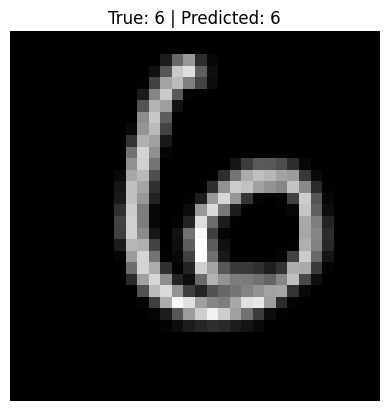

True Label: 6
Predicted Label: 6


In [77]:
# Pick a sample from the test set (example: index 15)
index = 100
img = x_test[index]

# Preprocess the image to match LeNet input (32x32, normalized, channel=1)
img_resized = cv2.resize(img, (32, 32))  # LeNet expects 32x32 input
img_input = img_resized / 255.0
img_input = img_input.reshape(1, 32, 32, 1)

# Predict using trained model
prediction = model.predict(img_input)
predicted_class = np.argmax(prediction)

# Show results
plt.imshow(img_resized, cmap='gray')
plt.title(f"True: {y_test[index]} | Predicted: {predicted_class}")
plt.axis('off')
plt.show()

print("True Label:", y_test[index])
print("Predicted Label:", predicted_class)
